<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Logistic%20Regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


**ABSTRACT**

This is a hands-on practice of implementing the Logistic Regression Algorithm on Churn Modelling Dataset.

1. Load the Churn Modelling Dataset and pre-process the dataset with LabelEncoder, OneHotEncoder and StandardScaler.
2. Implement Logistic Regression Algorithm from scratch by defining the Sigmoid Function, Cross-Entropy Function and Gradient Descent using Python, run the gradient descent using Scipy fmin_cg to calculate the $\theta$. Then make predictions and evaluate the results with Accuracy Score and Confusion Matrix.
3. As a comparation, run the LogisticRegression Model from sklearn, compare the results with the above implementation from scratch. The conclusion is the same Accuracy Score is achieved.



## 1. Data Preprocessing

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



### 1.1 Importing the dataset

In [0]:
datafile = 'https://raw.githubusercontent.com/jchen8000/MachineLearning/master/Classification/data/Churn_Modelling.csv'
dataset = pd.read_csv(datafile)


In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


### 1.2 Encoding categorical data

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


### 1.3 Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### 1.4 Add Bias vector

In [7]:
print("Before bias vector added:", X.shape)
m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))
print("After add bias vector", X.shape)

Before bias vector added: (10000, 12)
After add bias vector (10000, 13)


### 1.5 Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (8000, 13)
X_test:  (2000, 13)
y_train:  (8000,)
y_test:  (2000,)


## 2. Logistic Regression 

### 2.1 Sigmoid function, Cost Function and Gradient Descent



**2.1.1 Sigmoid function**

> # $h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta^{T}x} }  $

> The sigmoid function is having a characteristic "S"-shaped curve or ***sigmoid curve***, as  below

> ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

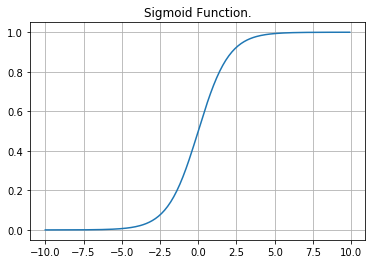

In [9]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

axis_x = np.arange(-10,10,.1)
plt.plot(axis_x,sigmoid(axis_x))
plt.title("Sigmoid Function.")
plt.grid(True)

**2.1.2 Regularized Cross Entropy Cost Function**

> The Regularized Cross Entropy Function is defined as following:

>## $J(\theta) = \displaystyle\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$


**2.1.3 Regularized Gradient Descent for Logistic Regression**

>  for j = 0:

>> ## $\displaystyle\frac{\partial J(\theta)}{\partial \theta_{0}} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x_{j}^{(i)}$

> for j >= 1:

>> ## $\displaystyle\frac{\partial J(\theta)}{\partial \theta_{j}} = \Big(\frac{1}{m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{j}\Big) + \frac{\lambda}{m} \theta_{j} $

> The following code implements the above math expression.

In [0]:
def costFunction(theta_t, X_t, y_t, lambda_t):
    m = len(y_t)
    J = (-1/m) * (y_t.T @ np.log(sigmoid(X_t @ theta_t)) + (1 - y_t.T) @ np.log(1 - sigmoid(X_t @ theta_t)))
    reg = (lambda_t/(2*m)) * (theta_t[1:].T @ theta_t[1:])
    J = J + reg
    return J
  

def GradientDescent(theta, X, y, lambda_t):
    m = len(y)
    grad = np.zeros([m,1])
    grad = (1/m) * X.T @ (sigmoid(X @ theta) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

### 2.2 Learning parameters using fmin_tnc

In [11]:
(m, n) = X_train.shape
#y_train = y_train[:, np.newaxis]
theta = np.zeros((n,1))
lmbda = 1
J = costFunction(theta, X_train, y_train, lmbda)
print("The initial cost: ", J)

The initial cost:  [[0.69314718]]


In [12]:
import scipy.optimize as opt  
iteration = 50


theta = opt.fmin_cg(f = costFunction, x0 = theta.flatten(),  fprime = GradientDescent, args = (X_train, y_train.flatten(), lmbda), maxiter = iteration)


print("theta = \n", theta) 

Optimization terminated successfully.
         Current function value: 0.429069
         Iterations: 8
         Function evaluations: 19
         Gradient evaluations: 19
$	heta$ =  [-1.63685723 -0.14136409  0.23636897 -0.07364662 -0.07208391 -0.26918615
  0.75457167 -0.08137458  0.15306213 -0.085331   -0.02370001 -0.51819785
  0.02916427]


In [13]:
J = costFunction(theta, X_train, y_train, lmbda)
print("The final cost: ", J)

The final cost:  0.42906933690751703


### 2.3 Evaluating logistic regression

In [14]:
y_pred = sigmoid(np.dot(X_test, theta))
y_pred = (y_pred >= 0.5)
y_pred.shape

(2000,)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1526   69]
 [ 309   96]]

Accuracy Score: 0.811

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



## 3. Logistic Regression using Scikit Learn Model

### 3.1 Remove the bias vector which is used by previous method

In [0]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

### 3.2 Train the Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0, solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.3 Evaluate the Logistic Regression Model

In [18]:
y_pred = logreg.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1526   69]
 [ 309   96]]

Accuracy Score: 0.811

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



## 4. Conclusion

**The Logistic Regression build from scratch has the same results with the Scikit Learn Logistic Regression Model.**